In [ ]:
# before we start BICePs sampling, let's compute J coupling constants for each state
import sys, os
sys.path.append('new_src')
from toolbox import *       
index=np.load('ind.npy')       # atom indices for each J couplings
karplus_key=np.load('Karplus.npy')    # Karplus relation for each J couplings
for i in range(100):    # 100 states in total
    print i
    J = compute_nonaa_Jcoupling('pdbs_guangfeng/%d.pdb'%i, index=index, karplus_key=karplus_key)
    np.savetxt('J_coupling/%d.txt'%i,J)


In [1]:
# import source code
import sys, os, glob
from numpy import *
sys.path.append('new_src')
from Preparation import *
from PosteriorSampler import *
from Analysis_new import *
from Restraint import *

new_src/Analysis_new.py:20: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/yunhuige/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/Users/yunhuige/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/Users/yunhuige/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/yunhuige/anaconda2/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/yunhuige/anaconda2/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 478, in start
    self.io_loop.s

In [2]:
#########################################
# Lets' create input files for BICePs
############ Preparation ################
# Specify necessary argument values
path='NOE/*txt'        # precomputed distances for each state
states=100                    # number of states
indices='atom_indice_noe.txt'   # atom indices of each distance
exp_data='noe_distance.txt'  # experimental NOE data 
top='pdbs_guangfeng/0.pdb'    # topology file 
data_dir=path                 # directory of precomputed data 
dataFiles = 'noe_J'           # output directory of BICePs formated input file from this scripts
out_dir=dataFiles               

#p=Preparation('noe',states=states,indices=indices,exp_data=exp_data,top=top,data_dir=data_dir)  # the type of data needs to be specified {'noe', 'J', 'cs_H', etc}
#p.write(out_dir=out_dir)     # raw data will be converted to a BICePs readable format to the folder specified


In [10]:
# An example of BICePs readable format input file 
with open(dataFiles+'/0.noe', 'r') as f:
    line = f.readlines()
for i in range(len(line)):
    print line[i].strip()

#restraint_index atom_index1 res1 atom_name1 atom_index2 res2 atom_name2 exp_noe(A) model_noe(A)
0            44       UNK1     H24          42       UNK1     H23            0.3800      0.4250
1            45       UNK1     H25          28       UNK1     H11            0.3800      0.4263
2            45       UNK1     H25          47       UNK1     H26            0.3800      0.3115
2            45       UNK1     H25          48       UNK1     H27            0.3800      0.3736
2            45       UNK1     H25          49       UNK1     H28            0.3800      0.2542
3            21       UNK1     H5           16       UNK1     H2             0.3800      0.4199
3            21       UNK1     H5           17       UNK1     H3             0.3800      0.3892
3            21       UNK1     H5           18       UNK1     H4             0.3800      0.4417
4            21       UNK1     H5           47       UNK1     H26            0.3800      0.4288
4            21       UNK1     H5      

In [11]:
# similar step for J couplings
#########################################
# Lets' create input files for BICePs
############ Preparation ################
# Specify necessary argument values
path='J_coupling/*txt'        # precomputed J couplings for each state
states=100                    # number of states
indices='atom_indice_J.txt'   # atom indices of each J coupling
exp_data='exp_Jcoupling.txt'  # experimental J coupling data 
top='pdbs_guangfeng/0.pdb'    # topology file 
data_dir=path                 # directory of precomputed data 
dataFiles = 'noe_J'           # output directory of BICePs formated input file from this scripts
out_dir=dataFiles               

p=Preparation('J',states=states,indices=indices,exp_data=exp_data,top=top,data_dir=data_dir)  # the type of data needs to be specified {'noe', 'J', 'cs_H', etc}
p.write(out_dir=out_dir)     # raw data will be converted to a BICePs readable format to the folder specified


NameError: name 'Preparation' is not defined

In [13]:
# An example of BICePs readable format input file 
with open(dataFiles+'/0.J', 'r') as f:
    line = f.readlines()
for i in range(len(line)):
    print line[i].strip()

#restraint_index atom_index1 res1 atom_name1 atom_index2 res2 atom_name2 atom_index3 res3 atom_name3 atom_index4 res4 atom_name4 exp_J_coupling(Hz) model_J_coupling(Hz)
0            45       UNK1     H25          3        UNK1     C2           4        UNK1     C3           44       UNK1     H24           15.5000      11.5993
1            21       UNK1     H5           20       UNK1     C14          19       UNK1     C13          22       UNK1     H6            16.1000      11.5908
2            22       UNK1     H6           19       UNK1     C13          13       UNK1     C11          23       UNK1     H7             6.1000       3.7798
3            28       UNK1     H11          11       UNK1     C9           10       UNK1     C8           29       UNK1     H12            6.3000       3.0653
4            28       UNK1     H11          11       UNK1     C9           10       UNK1     C8           30       UNK1     H13            6.3000      11.4603
5            37       UNK1     H19  

In [3]:
#########################################
# Let's create our ensemble of structures
############ Initialization #############    
# Specify necessary argument values
data = sort_data(dataFiles)   # sorting data in the folder and figure out what types of data are used
print data
print len(data),len(data[0])
#sys.exit(1)
energies_filename =  'albocycline_QMenergies.dat'
energies = loadtxt(energies_filename)
energies = loadtxt(energies_filename)*627.509  # convert from hartrees to kcal/mol
energies = energies/0.5959   # convert to reduced free energies F = f/kT
energies -= energies.min()  # set ground state to zero, just in case
outdir = 'results_ref_normal'
# Temporarily placing the number of steps here...
nsteps = 100 # number of steps of MCMC simulation

# Make a new directory if we have to
if not os.path.exists(outdir):
    os.mkdir(outdir)


[['noe_J/0.J', 'noe_J/0.noe'], ['noe_J/1.J', 'noe_J/1.noe'], ['noe_J/2.J', 'noe_J/2.noe'], ['noe_J/3.J', 'noe_J/3.noe'], ['noe_J/4.J', 'noe_J/4.noe'], ['noe_J/5.J', 'noe_J/5.noe'], ['noe_J/6.J', 'noe_J/6.noe'], ['noe_J/7.J', 'noe_J/7.noe'], ['noe_J/8.J', 'noe_J/8.noe'], ['noe_J/9.J', 'noe_J/9.noe'], ['noe_J/10.J', 'noe_J/10.noe'], ['noe_J/11.J', 'noe_J/11.noe'], ['noe_J/12.J', 'noe_J/12.noe'], ['noe_J/13.J', 'noe_J/13.noe'], ['noe_J/14.J', 'noe_J/14.noe'], ['noe_J/15.J', 'noe_J/15.noe'], ['noe_J/16.J', 'noe_J/16.noe'], ['noe_J/17.J', 'noe_J/17.noe'], ['noe_J/18.J', 'noe_J/18.noe'], ['noe_J/19.J', 'noe_J/19.noe'], ['noe_J/20.J', 'noe_J/20.noe'], ['noe_J/21.J', 'noe_J/21.noe'], ['noe_J/22.J', 'noe_J/22.noe'], ['noe_J/23.J', 'noe_J/23.noe'], ['noe_J/24.J', 'noe_J/24.noe'], ['noe_J/25.J', 'noe_J/25.noe'], ['noe_J/26.J', 'noe_J/26.noe'], ['noe_J/27.J', 'noe_J/27.noe'], ['noe_J/28.J', 'noe_J/28.noe'], ['noe_J/29.J', 'noe_J/29.noe'], ['noe_J/30.J', 'noe_J/30.noe'], ['noe_J/31.J', 'noe_J/31.no

In [4]:
######################
# Main:
######################

lambda_values = [0.0,0.5,1.0]    # lambda values to be sampled
for j in lambda_values:
    verbose = True#False
    lam = j
    # We will instantiate a number of Restraint() objects to construct the ensemble
    ensemble = []
    for i in range(energies.shape[0]):
        print '\n#### STRUCTURE %d ####'%i
        ensemble.append([])
        for k in range(len(data[0])):
            File = data[i][k]
            if verbose:
                print File

            # Call on the Restraint that corresponds to File
            if File.endswith('cs_H'):
                R = Restraint_cs_H('8690.pdb',ref='exp')
                R.prep_observable(lam=lam, free_energy=energies[i],
                        filename=File)


            elif File.endswith('cs_CA'):
                R = Restraint_cs_Ca('8690.pdb',ref='gaussian')
                R.prep_observable(lam=lam, free_energy=energies[i],
                        filename=File)

            elif File.endswith('cs_Ha'):
                R = Restraint_cs_Ha('8690.pdb',ref='exp')
                R.prep_observable(lam=lam, free_energy=energies[i],
                        filename=File)

            elif File.endswith('cs_N'):
                R = Restraint_cs_N('8690.pdb',ref='gaussian')
                R.prep_observable(lam=lam, free_energy=energies[i],
                        filename=File)

            elif File.endswith('J'):
                R = Restraint_J('pdbs_guangfeng/%d.pdb'%i,ref='uniform', dlogsigma=np.log(1.02), sigma_min=0.05, sigma_max=20.0)  # good ref
                R.prep_observable(lam=lam, free_energy=energies[i],
                        filename=File)

            elif File.endswith('noe'):
                R = Restraint_noe('pdbs_guangfeng/%d.pdb'%i,ref='exp',dlogsigma=np.log(1.02), sigma_min=0.05, sigma_max=5.0)   # good ref
                R.prep_observable(lam=lam, free_energy=energies[i],
                        filename=File, dloggamma=np.log(1.01),gamma_min=0.2,gamma_max=5.0)

            elif File.endswith('pf'):
                R = Restraint_pf('8690.pdb',ref='gaussian')
                R.prep_observable(lam=lam, free_energy=energies[i],
                        filename=File)

            ensemble[-1].append(R)
    print ensemble

    ##########################################
    # Next, let's do some posterior sampling
    ########## Posterior Sampling ############

    sampler = PosteriorSampler(ensemble)
    sampler.compile_nuisance_parameters()

    sampler.sample(nsteps)  # number of steps

    print 'Processing trajectory...',

    sampler.traj.process()  # compute averages, etc.
    print '...Done.'

    print 'Writing results...',
    sampler.traj.write_results(os.path.join(outdir,'traj_lambda%2.2f.npz'%lam))
    print '...Done.'
    sampler.traj.read_results(os.path.join(outdir,'traj_lambda%2.2f.npz'%lam))

    print 'Pickling the sampler object ...',
    outfilename = 'sampler_lambda%2.2f.pkl'%lam
    print outfilename,
    fout = open(os.path.join(outdir, outfilename), 'wb')
    # Pickle dictionary using protocol 0.
    cPickle.dump(sampler, fout)
    fout.close()
    print '...Done.'



#### STRUCTURE 0 ####
noe_J/0.J
----> 0 45       exp 15.5 model 11.5993
----> 1 21       exp 16.1 model 11.5908
----> 2 22       exp 6.1 model 3.7798
----> 3 28       exp 6.3 model 3.0653
----> 4 28       exp 6.3 model 11.4603
----> 5 37       exp 2.0 model 0.615
----> 6 42       exp 6.4 model 10.8062
----> 7 42       exp 6.4 model 2.9454
----> 8 42       exp 6.4 model 1.2403
----> 9 37       exp 6.9 model 2.7775
----> 10 37       exp 6.9 model 1.3802
----> 11 37       exp 6.9 model 10.8822
self.sse 67.0781190567
noe_J/0.noe

#### STRUCTURE 1 ####
noe_J/1.J
----> 0 45       exp 15.5 model 11.5936
----> 1 21       exp 16.1 model 11.588
----> 2 22       exp 6.1 model 11.5994
----> 3 28       exp 6.3 model 10.8603
----> 4 28       exp 6.3 model 4.4029
----> 5 37       exp 2.0 model 12.3062
----> 6 42       exp 6.4 model 3.436
----> 7 42       exp 6.4 model 10.7196
----> 8 42       exp 6.4 model 1.0717
----> 9 37       exp 6.9 model 2.9842
----> 10 37       exp 6.9 model 10.8572
----> 11 

Loading results_ref_normal/traj_lambda0.00.npz ...
Loading results_ref_normal/traj_lambda0.50.npz ...
Loading results_ref_normal/traj_lambda1.00.npz ...
Loading results_ref_normal/sampler_lambda0.00.pkl ...
Loading results_ref_normal/sampler_lambda0.50.pkl ...
Loading results_ref_normal/sampler_lambda1.00.pkl ...
lam = [0.0, 0.5, 1.0]
nstates 100
E0 evaluated in model 0 44.2855335482 sigma [[1.1199457111517286], [0.5072126781084301, 1.0125440412994817]]

step =  101
s[0] =  <Restraint.Restraint_J object at 0x111b52f10>
Result = 35.47377028442855
state 0, f_sim 0.0
s[0].sse 67.0781190567 s[0].Ndof 4.0
s[0].sum_neglog_exp_ref 0.0
s[0].sum_neglog_gaussian_ref 0.0

step =  101
s[1] =  <Restraint.Restraint_noe object at 0x1a13e8db50>
Result = 37.77707514799861
state 0, f_sim 0.0
s[1].sse[163] 0.10733980607262936 s[1].Ndof 10.0
s[1].sum_neglog_exp_ref 0.30644910847967355
s[1].sum_neglog_gaussian_ref 0.0
######################################################
sigma [[1.1199457111517286], [0.50

new_src/Analysis_new.py:239: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(True)
/Users/yunhuige/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/Users/yunhuige/anaconda2/lib/python2.7/site-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)
new_src/Analysis_new.py:248: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(True)
new_src/Analysis_new.py:256: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavio

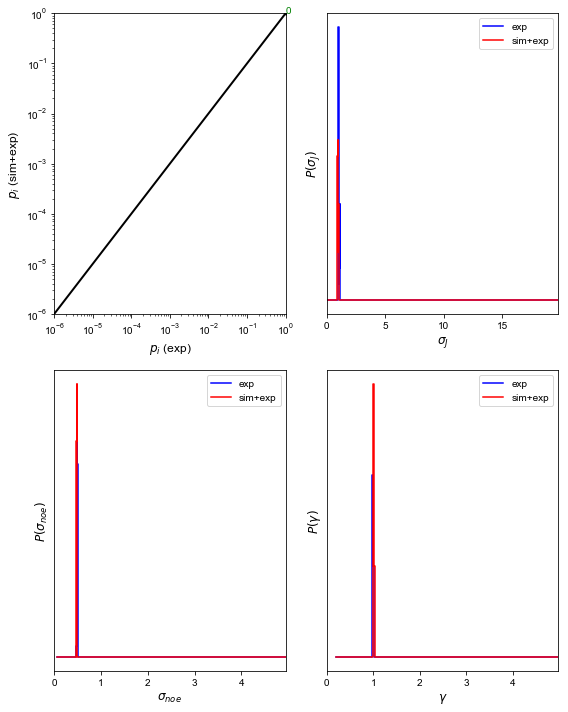

In [5]:
#########################################
# Let's do analysis using MBAR and plot figures
############ MBAR and Figures ###########
# Specify necessary argument values
%matplotlib inline
A = Analysis(100,dataFiles,outdir)    # number of states, input data files and output directory needs to be specified
A.plot()